In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

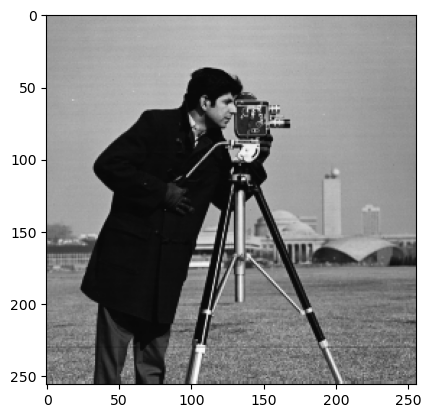

In [2]:
img = cv2.imread('./Fig0517(a).tif')
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [3]:
x,y = img.shape[0],img.shape[1]
x,y

(256, 256)

In [4]:
pic = np.zeros((x,y),np.uint8)
img_array = np.array(img)  # 把图片转化为矩阵
img_gray_array = np.array(img_gray)
# print(pic[1,2])

In [5]:
def histogram(img):   # 直方图
    x = img.shape[0]
    y = img.shape[1]
    x_axis = np.zeros(256)
    for i in range(x):
        for j in range(y):
            value = img[i,j][0]
            x_axis[value] += 1
#     for v in range(256):
#         x_axis[v] = x_axis[v]/(x*y)
    return x_axis

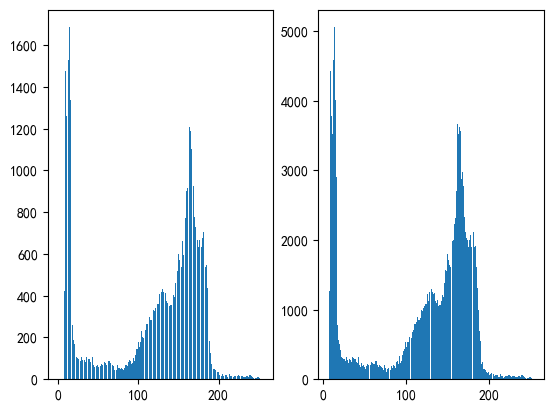

In [17]:
img_hist = histogram(img)
plt.figure()
plt.title("histogram")
plt.subplot(121)
plt.bar(range(256),img_hist)

plt.subplot(122)
plt.hist(img.ravel(),256)  # hist函数
plt.show()

In [7]:
for i in range(x):
    for j in range(y):
        if img_array[i,j][0]<=75:   # 手动设置阈值=75
            pic[i,j]=0
        else:
            pic[i,j]=1
        

In [9]:
l = len(img_gray_array)  # 矩阵大小
width = len(img_gray_array[0])

In [10]:
# 初始阈值th0=灰度值的均值
hmin = int(np.min(img_gray_array))
hmax = int(np.max(img_gray_array))
th0 = int((hmin+hmax)/2)

In [11]:
# 初始一些变量
th1=0
k1=0
k2=0
s1=0
s2=0

In [24]:
# 自动选阈值
while abs(th0-th1)>0:  #两层循环遍历每一个像素点
    for i in range(0,l-1):  
        for j in range(0,width-1):
            if img_gray[i,j]<th0:
                k1+=img_gray[i,j]
                s1+=1
            elif img_gray[i,j]>th0:
                k2+=img_gray[i,j]
                s2+=1
    avg1 = k1/s1  #算每一行像素点的灰度均值
    avg2 = k2/s2
    k1=0
    k2=0
    s1=0
    s2=0
    th1=th0
    th0=int((avg1+avg2)/2)  #更新灰度均值
th0,th1

(88, 88)

In [13]:
img_seg = np.where(img_gray[...,:]<th0,0,255)
# plt.figure()
# plt.imshow(img_seg,cmap='gray')
# plt.show()

<Figure size 640x480 with 0 Axes>

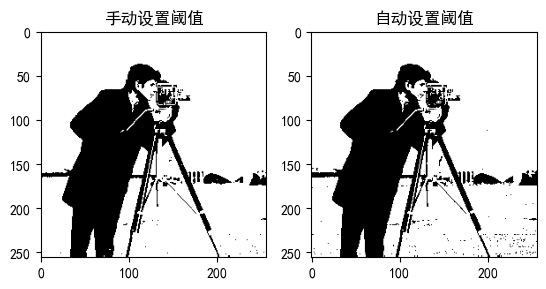

In [16]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']  #title显示中文
plt.rcParams['axes.unicode_minus'] = False
plt.show()
plt.subplot(121)
plt.title("手动设置阈值")
plt.imshow(pic,cmap='gray')

plt.subplot(122)
plt.title("自动设置阈值")
plt.imshow(img_seg,cmap='gray')

In [20]:
from skimage import filters

In [25]:
thresh = filters.threshold_otsu(img_gray,nbins=256)
thresh

88

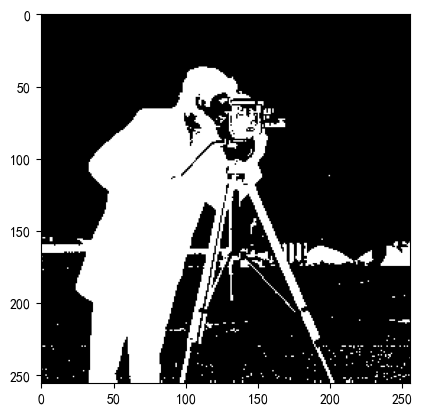

In [29]:
img_ski = (img_gray<=thresh)*1.0
plt.imshow(img_ski,cmap='gray')